# 历史区up主数据可视化

数据来自哔哩哔哩（Bilibili）视频平台五名历史博主（小约翰可汗、渤海小吏、历史调研室、安州牧、唠点历史），截至2024年6月14日

主要关注：**内容吸引力**、**粉丝参与度**

## 数据导入

In [3]:
import pandas as pd
df0 = pd.read_csv('data/AllVideoInfo.csv') # 总数据表
df1 = pd.read_csv('data/VideoInfo1.csv') # 小约翰可汗
df2 = pd.read_csv('data/VideoInfo2.csv') # 渤海小吏
df3 = pd.read_csv('data/VideoInfo3.csv') # 历史调研室
df4 = pd.read_csv('data/VideoInfo4.csv') # 安州牧
df5 = pd.read_csv('data/VideoInfo5.csv') # 唠点历史

In [4]:
UpDataList=[{"name":"小约翰可汗","uid":23947287,"follower":8488967,"df":df1},
            {"name":"渤海小吏","uid":504934876,"follower":3148293,"df":df2},
            {"name":"历史调研室","uid":519872016,"follower":5409822,"df":df3},
            {"name":"安州牧","uid":7481602,"follower":1860395,"df":df4},
            {"name":"唠点历史","uid":10698584,"follower":1527073,"df":df5},] # 粉丝数记录

## 可视化

### 图1 视频数据时间序列动态图表

In [44]:
import pandas as pd
from pyecharts.charts import Line
from pyecharts import options as opts
def plt_video_metrics(df,name,i):
    df['pubdate'] = pd.to_datetime(df['pubdate'])  # 确保日期列是datetime类型
    df.sort_values(by='pubdate', inplace=True)  # 按发布日期排序

    # 提取所需列并准备数据
    video_metrics = df1[['view', 'like', 'danmaku', 'share', 'reply']]
    video_dates = df['pubdate'].dt.strftime('%Y-%m-%d')  # 转换日期格式以便显示

    # 初始化折线图
    line = (
        Line()
        .add_xaxis(video_dates.tolist()) 
        .add_yaxis("播放量", video_metrics['view'].tolist(), 
                is_smooth=True, label_opts=opts.LabelOpts(is_show=False))  # 隐藏折线上的标签
        .add_yaxis("点赞量", video_metrics['like'].tolist(), 
                is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
        .add_yaxis("弹幕量", video_metrics['danmaku'].tolist(), 
                is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
        .add_yaxis("分享量", video_metrics['share'].tolist(), 
                is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
        .add_yaxis("评论量", video_metrics['reply'].tolist(), 
                is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"{name}视频各项指标数据展示"),
            tooltip_opts=opts.TooltipOpts(trigger="axis"),
            xaxis_opts=opts.AxisOpts(type_="category"),
        )
    )

    # 渲染图表
    line.render_notebook()  # 如果在Jupyter Notebook中使用
    line.render(f'page2/video_metrics{i}.html') #保存为HTML文件
    print(f"{name}, success! page2/video_metrics{i}.html")

In [45]:
import pandas as pd

i = 0
for up in UpDataList:
    df = up["df"]
    name = up["name"]
    i = i+1
    plt_video_metrics(df,name,i)

小约翰可汗, success! page2/video_metrics1.html
渤海小吏, success! page2/video_metrics2.html
历史调研室, success! page2/video_metrics3.html
安州牧, success! page2/video_metrics4.html
唠点历史, success! page2/video_metrics5.html


### 图2 播放量和点赞量关系

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plt_likes_views(df,name,i):
    # 计算相关系数
    corr_coef = np.corrcoef(df['view'], df['like'])[0, 1]
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 创建散点图
    plt.figure(figsize=(10, 6))
    plt.scatter(df['view'], df['like'])
    plt.xlabel('Views')
    plt.ylabel('Likes')
    plt.title(f'Likes vs Views of Videos (up: {name})'.format(corr_coef))
    plt.grid(True)

    # 添加相关系数文本
    plt.text(0.1, 0.9, 'Correlation: {:.2f}'.format(corr_coef), transform=plt.gca().transAxes)
    
    plt.savefig(f'page2/likes_vs_views{i}.png') # 保存，必须放在show前面

    plt.show()
  


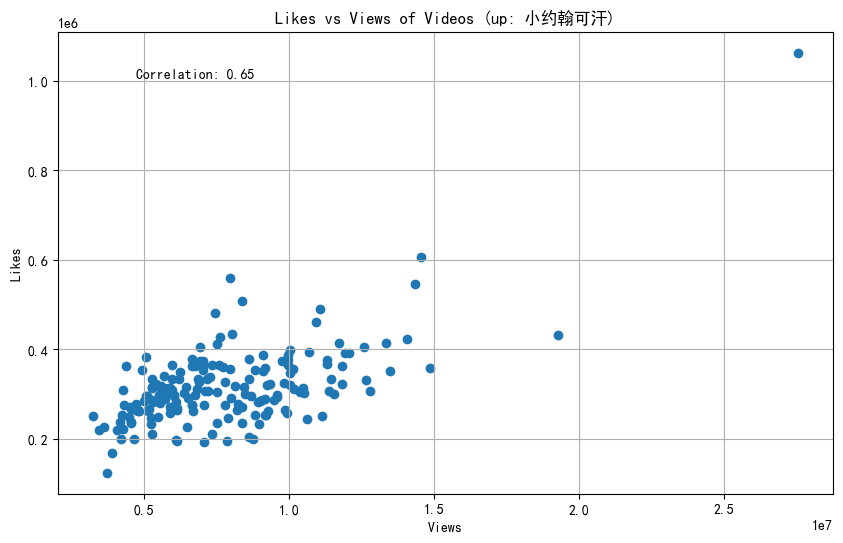

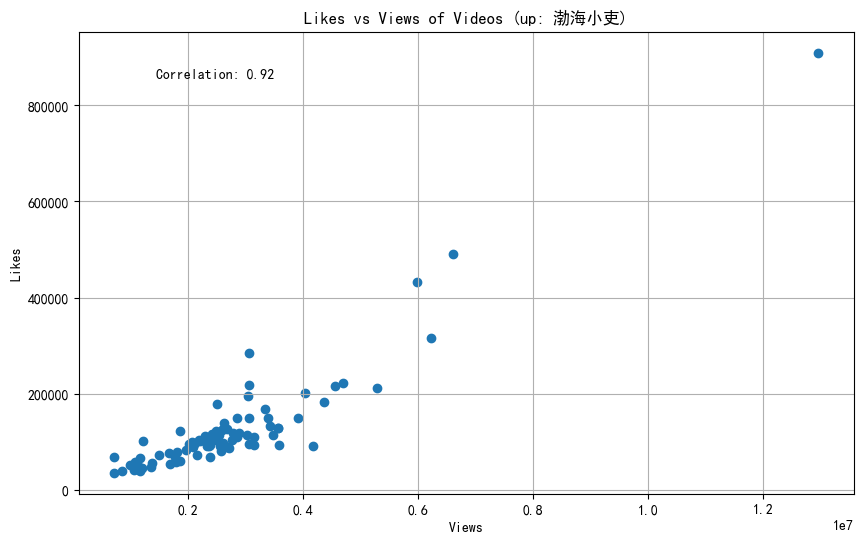

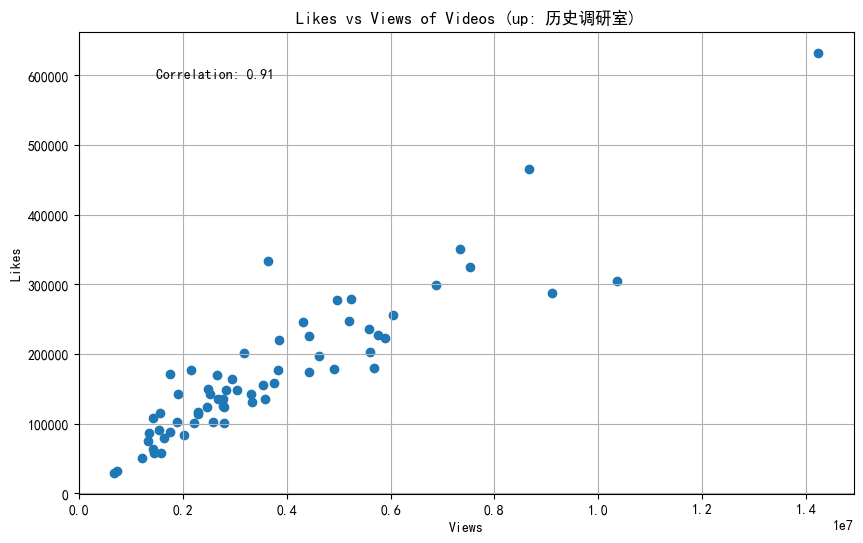

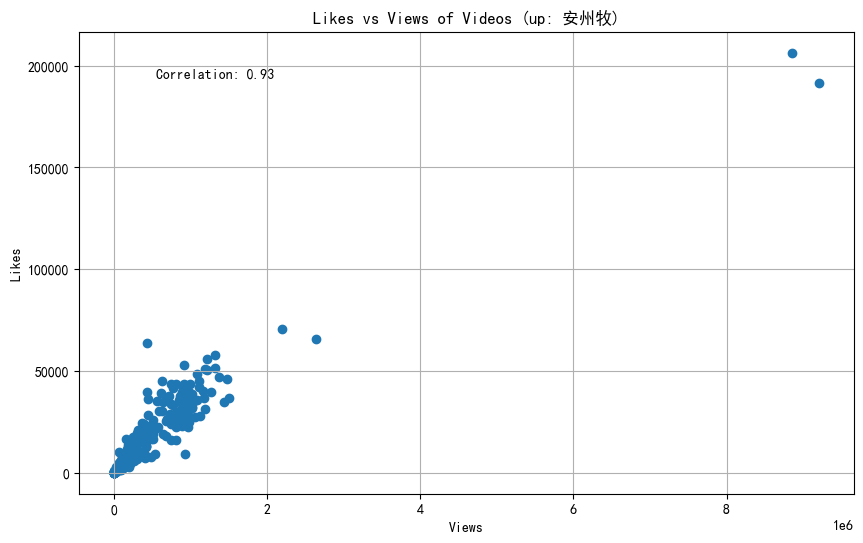

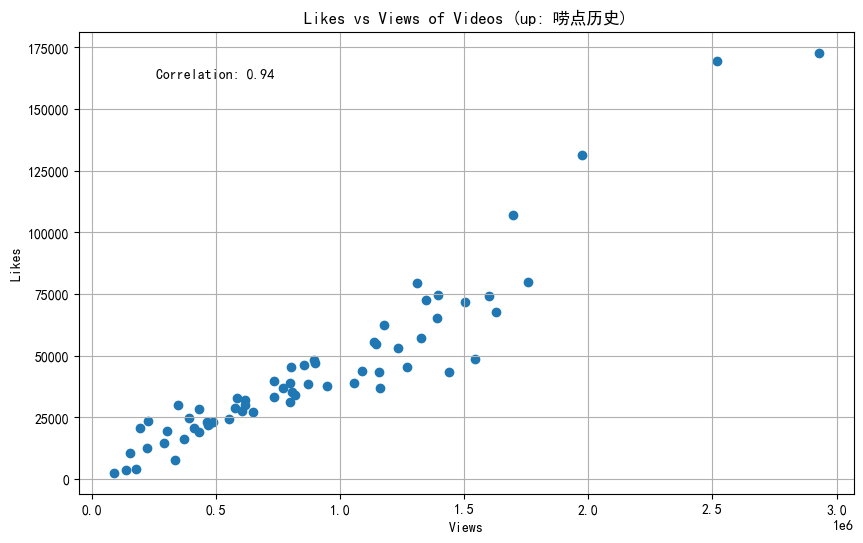

In [40]:
import pandas as pd

i = 0
for up in UpDataList:
    df = up["df"]
    name = up["name"]
    i = i+1
    plt_likes_views(df,name,i)

### 图3 每个up的点赞率等

In [5]:
# 定义计算平均指标的函数
def calculate_average_metrics(df):
    avg_view = df['view'].mean()
    avg_like_rate = df['like'].sum() / df['view'].sum()
    avg_favorite_rate = df['favorite'].sum() / df['view'].sum()
    avg_danmaku_rate = df['danmaku'].sum() / df['view'].sum()
    avg_share_rate = df['share'].sum() / df['view'].sum()
    avg_reply_rate = df['reply'].sum() / df['view'].sum()
    sum_views = df['view'].sum()
    sum_likes = df['like'].sum()
    
    
    return {
        'avg_view': avg_view,
        'avg_like_rate': avg_like_rate,
        'avg_favorite_rate': avg_favorite_rate,
        'avg_danmaku_rate': avg_danmaku_rate,
        'avg_share_rate': avg_share_rate,
        'avg_reply_rate': avg_reply_rate,
        'sum_views': sum_views,
        'sum_likes': sum_likes,
    }

# 遍历 UpDataList 并计算每个用户的指标
for user_info in UpDataList:
    df = user_info['df']
    metrics = calculate_average_metrics(df)
    print(metrics)
    # 更新 user_info 字典中的计算指标
    user_info.update(metrics)


{'avg_view': 7817898.133333334, 'avg_like_rate': 0.0404588263928262, 'avg_favorite_rate': 0.006659752503639683, 'avg_danmaku_rate': 0.004415000251161569, 'avg_share_rate': 0.0022641841591205065, 'avg_reply_rate': 0.0010490443956098733, 'sum_views': 1407221664, 'sum_likes': 56934537}
{'avg_view': 2703639.406976744, 'avg_like_rate': 0.046721996249422436, 'avg_favorite_rate': 0.013642704494242255, 'avg_danmaku_rate': 0.005176377479711467, 'avg_share_rate': 0.005066400828041482, 'avg_reply_rate': 0.0015178291824376315, 'sum_views': 232512989, 'sum_likes': 10863471}
{'avg_view': 3721880.640625, 'avg_like_rate': 0.04698447119481906, 'avg_favorite_rate': 0.015552894145277975, 'avg_danmaku_rate': 0.006610187295224125, 'avg_share_rate': 0.005146339807604238, 'avg_reply_rate': 0.0017522601487577091, 'sum_views': 238200361, 'sum_likes': 11191718}
{'avg_view': 565686.2813688213, 'avg_like_rate': 0.035583952227830645, 'avg_favorite_rate': 0.011731979350469901, 'avg_danmaku_rate': 0.0083504748214847

In [49]:
from pyecharts import options as opts
from pyecharts.charts import Bar

# 假设 UpDataList 中每个用户字典已经包含了计算后的指标

# 提取每个用户的名称和各项指标值，并转换成百分比（保留两位小数）
names = [user_info['name'] for user_info in UpDataList]
like_rates = [format(user_info['avg_like_rate'] * 100, '.2f') for user_info in UpDataList]
favorite_rates = [format(user_info['avg_favorite_rate'] * 100, '.2f') for user_info in UpDataList]
danmaku_rates = [format(user_info['avg_danmaku_rate'] * 100, '.2f') for user_info in UpDataList]
share_rates = [format(user_info['avg_share_rate'] * 100, '.2f') for user_info in UpDataList]
reply_rates = [format(user_info['avg_reply_rate'] * 100, '.2f') for user_info in UpDataList]

# 创建柱状图
bar = (
    Bar()
    .add_xaxis(names)
    .add_yaxis("点赞率 (%)", like_rates)
    .add_yaxis("收藏率 (%)", favorite_rates)
    .add_yaxis("弹幕率 (%)", danmaku_rates)
    .add_yaxis("转发率 (%)", share_rates)
    .add_yaxis("评论率 (%)", reply_rates)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各项指标百分比总表"),
        yaxis_opts=opts.AxisOpts(name="百分比"),
        xaxis_opts=opts.AxisOpts(name="用户"),
    )
)

# 渲染（生成）HTML文件
bar.render("page2/metrics_percentage.html")


'c:\\Users\\ZZH\\Desktop\\1\\page2\\metrics_percentage.html'

In [14]:
from pyecharts import options as opts
from pyecharts.charts import Bar
import math

# 假设 UpDataList 中每个用户字典已经包含了粉丝数量、总播放量和总点赞量的信息

# 提取每个用户的名称和相关统计信息，并进行对数转换（保留两位小数）
names = [user_info['name'] for user_info in UpDataList]
followers = [format(math.log10(user_info['follower']), '.2f') for user_info in UpDataList]
total_views = [format(math.log10(user_info['sum_views']), '.2f') for user_info in UpDataList]
total_likes = [format(math.log10(user_info['sum_likes']), '.2f') for user_info in UpDataList]

# 创建柱状图
bar = (
    Bar()
    .add_xaxis(names)
    .add_yaxis("粉丝数量 (对数)", followers)
    .add_yaxis("总播放量 (对数)", total_views)
    .add_yaxis("总点赞量 (对数)", total_likes)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="粉丝数量、总播放量和总点赞量"),
        yaxis_opts=opts.AxisOpts(name="数量（对数，保留两位小数）"),
        xaxis_opts=opts.AxisOpts(name="用户"),
    )
)

# 渲染（生成）HTML文件
bar.render("page2/user_stats_log.html")


'c:\\Users\\ZZH\\Desktop\\1\\page2\\user_stats_log.html'

### 图4 每位up视频质量变化